**Importing required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Loading Dataset**

In [24]:
df = pd.read_csv("Titanic-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Handling Missing values**

In [45]:
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])

**Encoding categorical features**

In [48]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

**Normalizing/Standardizing Numerical Features**

In [51]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

**Visualizing and removing outliers**

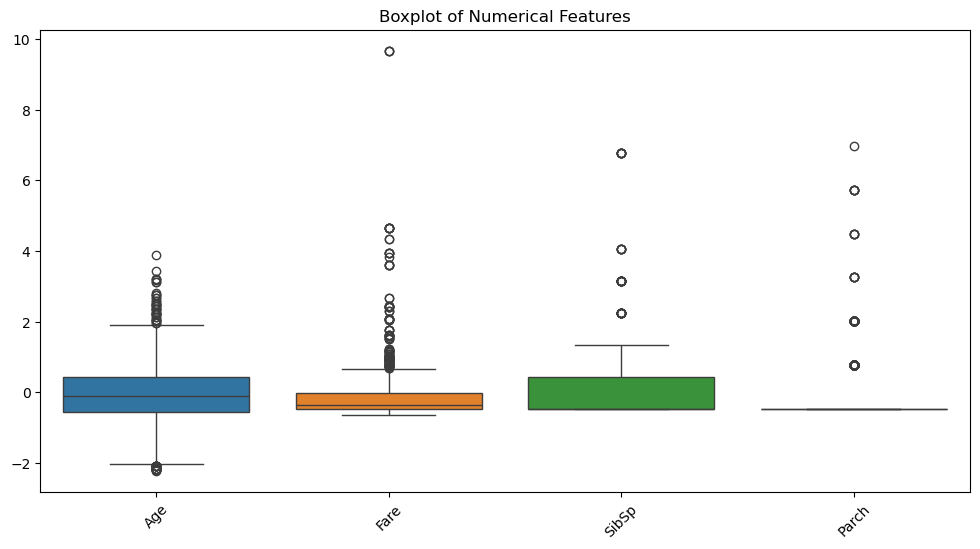

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

**Removing outliers using IQR**

In [59]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Final Data**

In [64]:
print("\nCleaned Data Info:\n")
df.info()


Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    int32  
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    float64
 7   Parch        577 non-null    float64
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    int32  
dtypes: float64(4), int32(2), int64(3), object(2)
memory usage: 49.6+ KB


In [66]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,-0.474545,-0.473674,330877,-0.478116,1
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,-0.335187,-0.474545,-0.473674,SOTON/OQ 392076,-0.506472,2
886,887,0,2,"Montvila, Rev. Juozas",1,-0.181487,-0.474545,-0.473674,211536,-0.386671,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,-0.796286,-0.474545,-0.473674,112053,-0.044381,2
889,890,1,1,"Behr, Mr. Karl Howell",1,-0.258337,-0.474545,-0.473674,111369,-0.044381,0


In [69]:
df.to_csv("preprocessed_titanic_dataset.csv")